In [1]:
import pandas as pd
import seaborn as sns
import numpy as nm
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('marvel_box_office.csv')

In [3]:
data

,Movie,Release Date,Release Month,Release Day,Release Year,Ownership,Domestic Box Office,Inflation Adjusted Domestic,International Box Office,Inflation Adjusted International,...,Inflation Adjusted Worldwide,Opening Weekend,Budget,IMDb Score,Meta Score,Tomatometer,Rotten Tomato Audience Score,Run Time In Minutes,Phase,Director
0,Iron Man,5/2/2008,May,2,2008,Marvel Studios,318604126,467231126,266567421,3.909196e+08,...,8.581507e+08,102118668,186000000,7.9,79.0,94,91,126,One,Jon Favreau
1,The Incredible Hulk,6/13/2008,June,13,2008,Marvel Studios,134806913,197704288,130766946,1.917794e+08,...,3.894837e+08,55414050,137500000,6.6,61.0,67,69,112,One,Louis Leterrier
2,Iron Man 2,5/7/2010,May,7,2010,Marvel Studios,312433331,416973763,308723058,4.120220e+08,...,8.289958e+08,128122480,170000000,6.9,57.0,72,71,124,One,Jon Favreau
3,Thor,5/6/2011,May,6,2011,Marvel Studios,181030624,240384926,268295994,3.562619e+08,...,5.966468e+08,65723338,150000000,7.0,57.0,77,76,115,One,Kenneth Brangh
4,Captain America: The First Avenger,7/22/2011,July,22,2011,Marvel Studios,176654505,234574020,193915271,2.574941e+08,...,4.920681e+08,65058524,140000000,6.9,66.0,80,75,124,One,Joe Johnston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Punisher: Warzone,12/5/2008,December,5,2008,Lionsgate Films,8050977,11807352,2106557,3.089421e+06,...,1.489677e+07,4271451,35000000,5.9,30.0,29,42,103,NaN,Lexi Alexander
62,Blade,8/21/1998,August,21,1998,New Line Cinema,70141876,157482710,61095812,1.371725e+08,...,2.946552e+08,17073856,45000000,7.1,47.0,58,78,120,NaN,Stephen Norrington
63,Blade II,3/22/2002,March,22,2002,New Line Cinema,81676888,148030572,72661713,1.316915e+08,...,2.797221e+08,32528016,54000000,6.7,52.0,57,68,117,NaN,Guillermo del Toro
64,Blade: Trinity,12/8/2004,December,8,2004,New Line Cinema,52397389,88619322,78955776,1.335373e+08,...,2.221567e+08,16061271,65000000,5.8,38.0,24,58,113,NaN,David S. Goyer


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Movie                             66 non-null     object 
 1   Release Date                      66 non-null     object 
 2   Release Month                     66 non-null     object 
 3   Release Day                       66 non-null     int64  
 4   Release Year                      66 non-null     int64  
 5   Ownership                         66 non-null     object 
 6   Domestic Box Office               66 non-null     int64  
 7   Inflation Adjusted Domestic       66 non-null     int64  
 8   International Box Office          66 non-null     int64  
 9   Inflation Adjusted International  66 non-null     float64
 10  Worldwide Box Office              66 non-null     int64  
 11  Inflation Adjusted Worldwide      66 non-null     float64
 12  Opening We

In [5]:
data['Director'].value_counts()

Anthony and Joe Russo           4
Brian Singer                    4
Sam Raimi                       4
James Gunn                      3
Jon Watts                       3
Peyton Reed                     3
Jon Favreau                     2
Ryan Coogler                    2
Joss Whedon                     2
Mark Steven Johnson             2
Marc Webb                       2
Tim Story                       2
James Mangold                   2
Taika Waititi                   2
Joe Johnston                    1
Louis Leterrier                 1
Kenneth Brangh                  1
Shane Black                     1
Alan Taylor                     1
Scott Derrickson                1
Destin Daniel Cretton           1
Chloe Zhao                      1
Nia DaCosta                     1
Andy Serkis                     1
Ruben Fleischer                 1
Cate Shortland                  1
Anna Boden & Ryan Fleck         1
Brett Ratner                    1
Mark Neveldine, Brian Taylor    1
Matthew Vaughn

In [6]:
data.groupby('Director')[ 'Movie'].first()

Director
Alan Taylor                                            Thor: The Dark World
Andy Serkis                                     Venom: Let There be Carnage
Anna Boden & Ryan Fleck                                      Captain Marvel
Anthony and Joe Russo                   Captain America: The Winter Soldier
Brett Ratner                                          X-Men: The Last Stand
Brian Singer                                                          X-Men
Cate Shortland                                                  Black Widow
Chloe Zhao                                                         Eternals
Daniel Espinosa                                                     Morbius
David Leitch                                                     Deadpool 2
David S. Goyer                                               Blade: Trinity
Destin Daniel Cretton             Shang-Chi and the Legend of the Ten Rings
Gavin Hood                                         X-Men Origins: Wolverine
Gui

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
marvel = data[['Opening Weekend','Budget','IMDb Score','Meta Score','Tomatometer','Rotten Tomato Audience Score']]

In [9]:
marvel

,Opening Weekend,Budget,IMDb Score,Meta Score,Tomatometer,Rotten Tomato Audience Score
0,102118668,186000000,7.9,79.0,94,91
1,55414050,137500000,6.6,61.0,67,69
2,128122480,170000000,6.9,57.0,72,71
3,65723338,150000000,7.0,57.0,77,76
4,65058524,140000000,6.9,66.0,80,75
...,...,...,...,...,...,...
61,4271451,35000000,5.9,30.0,29,42
62,17073856,45000000,7.1,47.0,58,78
63,32528016,54000000,6.7,52.0,57,68
64,16061271,65000000,5.8,38.0,24,58


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [11]:
scaler = StandardScaler().fit_transform(marvel)

In [12]:
marvel = pd.DataFrame(scaler, columns=[['Opening Weekend','Budget','IMDb Score','Meta Score','Tomatometer','Rotten Tomato Audience Score']])

In [13]:
marvel

,Opening Weekend,Budget,IMDb Score,Meta Score,Tomatometer,Rotten Tomato Audience Score
0,0.072801,0.329919,-0.114375,1.266395,1.092705,0.895409
1,-0.632268,-0.330868,-0.193324,0.191308,0.007914,-0.243062
2,0.465364,0.111927,-0.175105,-0.047601,0.208801,-0.139565
3,-0.476635,-0.160562,-0.169032,-0.047601,0.409688,0.119179
4,-0.486672,-0.296807,-0.175105,0.489943,0.530221,0.067430
...,...,...,...,...,...,...
61,-1.404334,-1.727376,-0.235835,-1.660232,-1.518829,-1.640276
62,-1.211065,-1.591132,-0.162959,-0.644872,-0.353683,0.222676
63,-0.977763,-1.468511,-0.187251,-0.346236,-0.393861,-0.294811
64,-1.226351,-1.318642,-0.241908,-1.182415,-1.719716,-0.812297


In [14]:
def random_cluster(marvel, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=20)
        kmeans.fit(marvel)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)

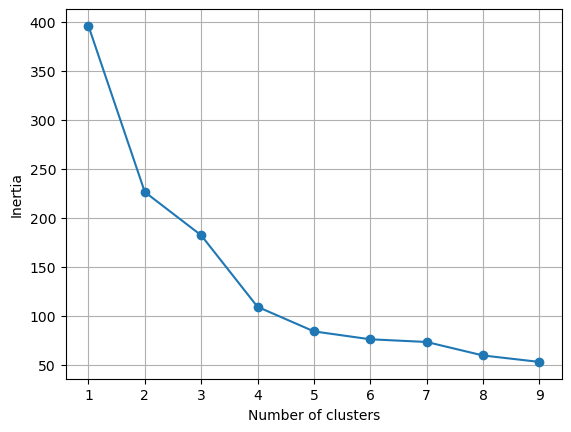

In [15]:
random_cluster(marvel,10)

In [16]:
kmeans = KMeans(n_clusters=4, random_state=20)

In [17]:
kmeans.fit(marvel)

KMeans(n_clusters=4, random_state=20)

In [18]:
clusters = kmeans.labels_

In [19]:
predictions = kmeans.predict(marvel)

In [20]:
uninque, counts = nm.unique(predictions, return_counts=True)

In [21]:
counts = counts.reshape(1, 4)

In [22]:
countsdf = pd.DataFrame(counts, columns=['cluster0','cluster1','cluster2','cluster3'])

In [23]:
countsdf

,cluster0,cluster1,cluster2,cluster3
0,16,14,34,2


In [24]:
X = marvel

In [25]:
y = predictions

In [26]:
target_names = ['cluster0','cluster1','cluster2','cluster3']

In [27]:
pca = PCA(n_components=2, random_state=20)

In [28]:
X_pca = pca.fit_transform(X)

In [29]:
X_pca

array([[-1.69560875, -0.33242336],
       [ 0.34217563, -0.5642962 ],
       [-0.27979228,  0.18398003],
       [-0.00738779, -0.41769814],
       [-0.24815595, -0.59029003],
       [-2.18255006,  0.76413119],
       [-1.14288301,  0.56265739],
       [ 0.16331364, -0.24693859],
       [-1.26258844, -0.39163286],
       [-1.46529012, -0.45787048],
       [-2.22906657,  1.64147744],
       [-0.37265977, -0.77355746],
       [-2.24989915,  0.66701923],
       [-1.08105816, -0.45980667],
       [-1.43217706,  0.23670523],
       [-1.43395717, -0.20340301],
       [-1.53413498, -0.12323091],
       [-2.40092621,  0.43475842],
       [-2.7426824 ,  1.59963335],
       [-0.62219844, -0.67693549],
       [-0.19198117,  0.58742694],
       [-4.25933507,  2.81782748],
       [-1.24185257, -0.50512795],
       [-1.05533794, -0.31436958],
       [-1.25161896, -0.74321718],
       [ 0.37231419, -0.05859237],
       [-2.62928189,  0.87319222],
       [-1.21892685,  0.58923772],
       [-0.73979895,

In [30]:
X_pca.shape

(66, 2)

In [31]:
# variance percentage for each components
print('Explained variance ratio (first two components): %s'%str(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.61348847 0.18232197]


Text(0.5, 1.0, 'PCA of data points')

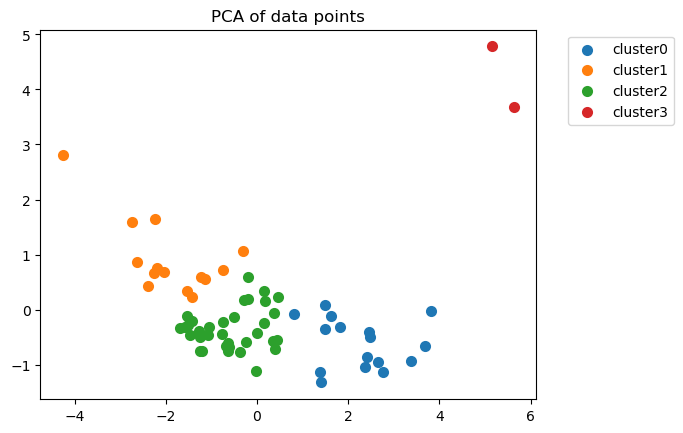

In [32]:
# plotting the data
colors = ['red','darkorange','green','blue']

for color, i, target_names in zip(colors, [0,1,2,3], target_names):
    plt.scatter(X_pca[y== i,0], X_pca[y== i,1], linewidths=2, label=target_names)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
plt.title('PCA of data points')

In [37]:
countsdf

,cluster0,cluster1,cluster2,cluster3
0,16,14,34,2
